## **Problem statement:** 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

---

### **Table of contents:**


1. Importing required libraries
2. Data Preparation
3. Data Visualization
4. Model Building
5. Conclusion

##### **Data Source :**
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Importing Required Libraries

In [3]:
# importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import glob

In [4]:
# mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Loading the Data set
!unzip "/content/gdrive/MyDrive/Official/M. Sc/CNN assignment/CNN_assignment.zip" # specified path of zipped dataset

Archive:  /content/gdrive/MyDrive/Official/M. Sc/CNN assignment/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/

In [6]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [7]:
# Printing number of tran and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Images count : ",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Images count : ",image_count_test)
print("Total Images - ",image_count_train+image_count_test)

Train Images count :  2239
Test Images count :  118
Total Images -  2357


### Data Preparation

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
# use 80% of the images for training and 20% for validation
# Noting train dataset 
# use validation_split 0.2 while definiting
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
# Write your validation dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  label_mode="int",
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
#check the tensor shape
print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [14]:
# Listing out number of images or data in each class
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


In [15]:
# Defining test_ds from data_dir_test
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    image_size = (img_height, img_width),
    batch_size = batch_size
  )

Found 118 files belonging to 9 classes.


### Data Visualization

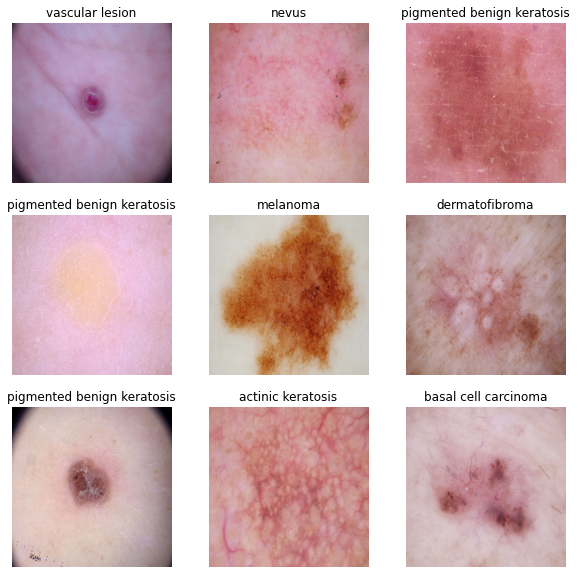

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

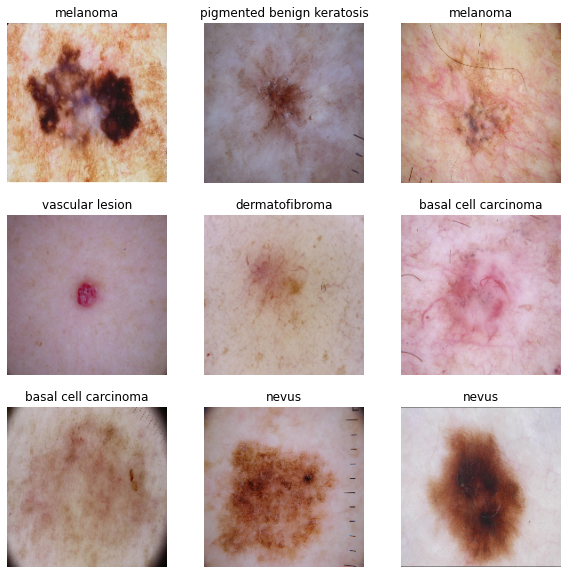

In [17]:
plt.figure(figsize=(10, 10))

for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

- The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). 
- The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
- Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
- Dataset.prefetch() overlaps data preprocessing and model execution while training.

### Model Building

###### Model 1

In [19]:
# Creating the model
# Create a CNN model, which can accurately detect 9 classes present in the dataset
# Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1)
# The RGB channel values are in the [0, 255] range
# This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Compliling the model
model.compile(
    optimizer ='adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [21]:
# Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [22]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 29s 141ms/step - loss: 2.0528 - accuracy: 0.2009 - val_loss: 2.0524 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 84ms/step - loss: 1.9159 - accuracy: 0.2785 - val_loss: 1.8737 - val_accuracy: 0.3043
Epoch 3/20
56/56 [==============================] - 5s 85ms/step - loss: 1.8145 - accuracy: 0.3181 - val_loss: 1.8172 - val_accuracy: 0.3557
Epoch 4/20
56/56 [==============================] - 5s 85ms/step - loss: 1.6795 - accuracy: 0.3901 - val_loss: 1.7632 - val_accuracy: 0.3669
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.6091 - accuracy: 0.4219 - val_loss: 1.5327 - val_accuracy: 0.4497
Epoch 6/20
56/56 [==============================] - 5s 85ms/step - loss: 1.5214 - accuracy: 0.4704 - val_loss: 1.4730 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 5s 84ms/step - loss: 1.4306 - accuracy: 0.4877 - val_loss: 1.5075 - val_accuracy: 0.4765
Epoch 8/20
56/56 [====

In [23]:
# checking the accuracy of the model to know whether the model is overfitting or underfitting
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 33ms/step - loss: 4.0614 - accuracy: 0.4855
Accuracy:  0.9146205186843872
Validation Accuracy:  0.4854586124420166
Loss:  0.20020322501659393
Validation Loss 4.0613837242126465


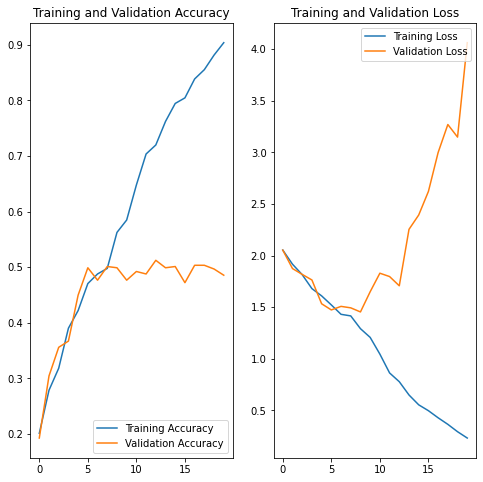

In [24]:
# Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation:
- In 20 epochs, we can observe the training accuracy is around 83.92%, where as validation accuracy is 54.36%. In terms of training and validation loss, we can observe training loss continuous decreases where as validation loss decreases upto 10 epoch and followed by a sharp increase in loss.

- Model is overfitting, as its calculated w.r.t. loss, and we can see the difference between loss in training and validation around 19-20th epoch; At the same we can notice training and validation accuracy

Handle overfitting (Data augmentation): Data augmentation can be used in deep learning to handle overfitting. It can be used to generate more sample images by flipping or random rotation

In [30]:
# after analysing the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = keras.Sequential([
       layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
       layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
])

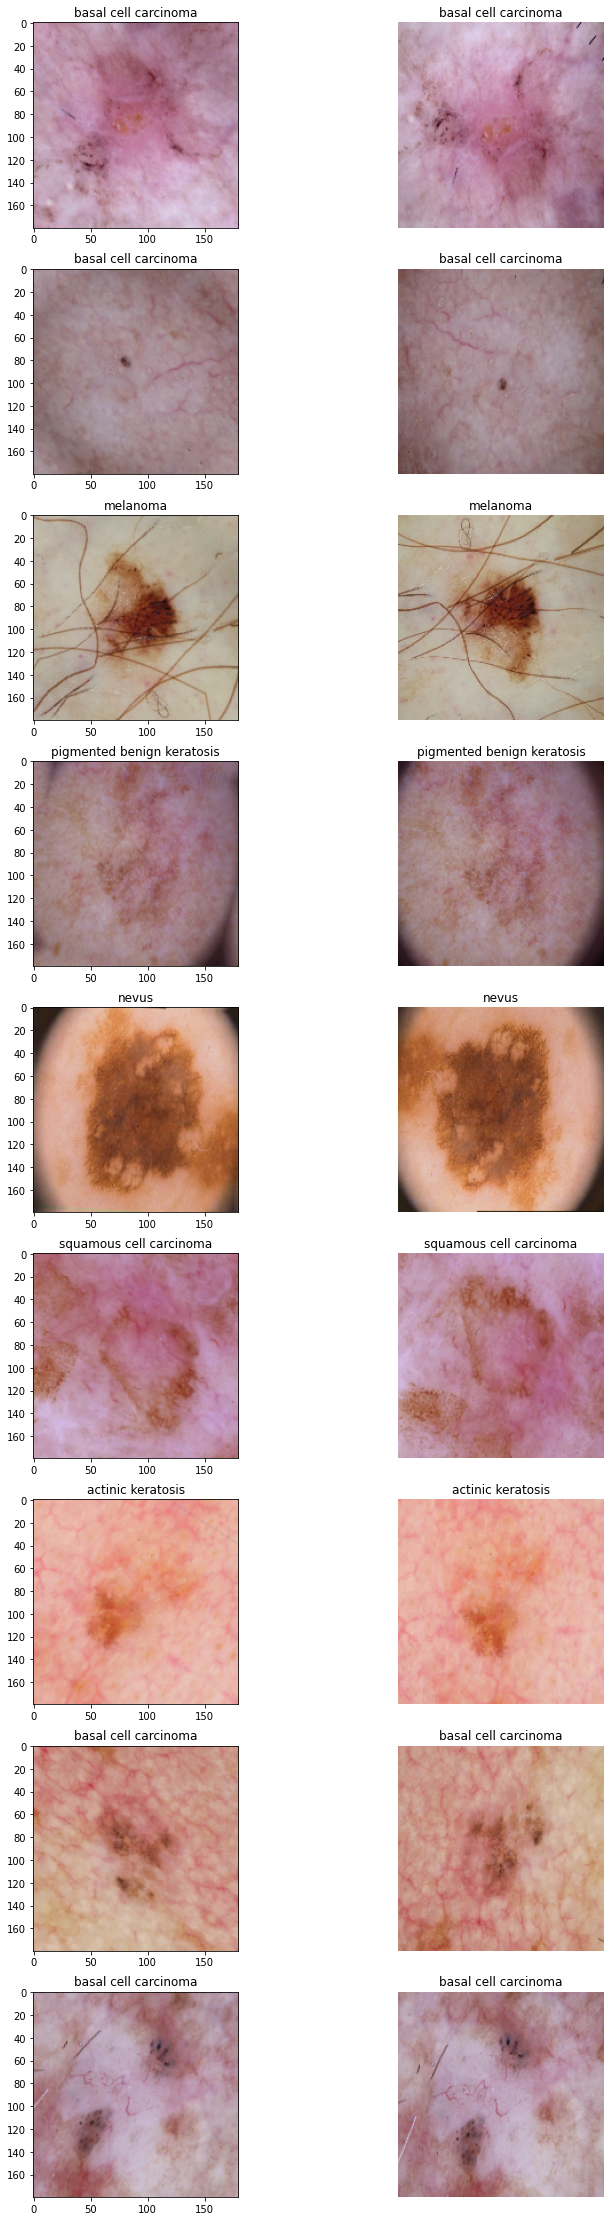

In [32]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 40))
for images, labels in list(train_ds.take(1)):
  augmented_image = data_augmentation(images)
  j=1
  for i in range(9):
    ax = plt.subplot(9, 2, j)
    plt.imshow(augmented_image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    j+=1

    ax = plt.subplot(9, 2, j)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    j+=1

  plt.show()

###### Model 2

In [33]:
# Building model 2
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
# Compiling the model
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)

In [35]:
# Viewing the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        9248      
                                                      

In [36]:
# training the model 
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 6s 99ms/step - loss: 2.1737 - accuracy: 0.1780 - val_loss: 2.0713 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0347 - accuracy: 0.1975 - val_loss: 2.0407 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0349 - accuracy: 0.1881 - val_loss: 2.0221 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 5s 94ms/step - loss: 2.0148 - accuracy: 0.2020 - val_loss: 1.9193 - val_accuracy: 0.2438
Epoch 5/20
56/56 [==============================] - 5s 91ms/step - loss: 1.9136 - accuracy: 0.2589 - val_loss: 1.8874 - val_accuracy: 0.3177
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 1.8686 - accuracy: 0.2829 - val_loss: 1.7832 - val_accuracy: 0.3199
Epoch 7/20
56/56 [==============================] - 5s 93ms/step - loss: 1.7747 - accuracy: 0.3242 - val_loss: 1.7144 - val_accuracy: 0.3557
Epoch 8/20
56/56 [======

In [37]:
# checking the accuracy of the model to know whether the model is overfitting or underfitting
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 32ms/step - loss: 1.3316 - accuracy: 0.5280
Accuracy:  0.5909598469734192
Validation Accuracy:  0.5279642343521118
Loss:  1.1838377714157104
Validation Loss 1.3315508365631104


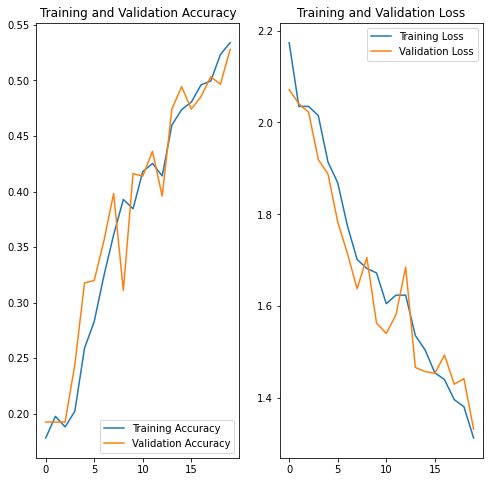

In [38]:
# Visualizing the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation:
- With data augmentation strategy, we can see that training and validation accuracy fairly aligns and remain constant, where training and validation loss constantly decreases over period of time.

- Though model accuracy has gone down, but model is not overfitting and requires more hyper parameter tuning. one of the option could be to train for more number of epocs and see the accuracy.

<BarContainer object of 9 artists>

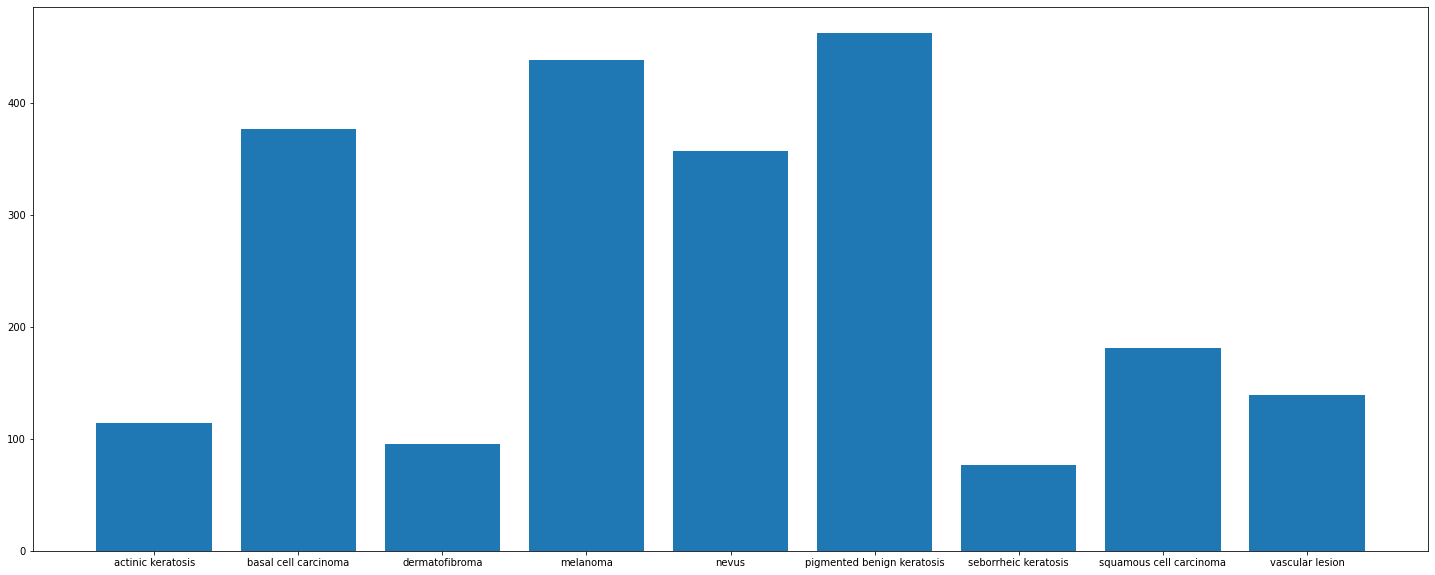

In [39]:
# Checking the distribution of class to determine whether the class is balanced or not
df=[]
for i in class_names:
    df.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,df)

In [40]:
path_list = [x for x in data_dir_train.glob(os.path.join( '*', '*.jpg'))]
print("path_list: ",len(path_list))
lesion_list = [os.path.basename(os.path.dirname(y)) for y in data_dir_train.glob(os.path.join( '*', '*.jpg'))]
print("lesion_list: ",len(lesion_list))
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

path_list:  2239
lesion_list:  2239


,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


observation:
- 'seborrheic keratosis' class has least number of samples
- Class "pigmented benign keratosis" dominate the data in presence

In [41]:
# to add more samples across all classes so that none of the classes have very few samples a python package Augmentor is used
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [42]:
#storing the augmented images in the output sub-directory of each of the sub-directories of skin cancer typesusing Augmentor
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2DD571D950>: 100%|██████████| 500/500 [00:21<00:00, 23.36 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2E4EBC1DD0>: 100%|██████████| 500/500 [00:21<00:00, 23.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2E4EDD5750>: 100%|██████████| 500/500 [00:22<00:00, 22.42 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2DD5962710>: 100%|██████████| 500/500 [01:49<00:00,  4.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F2E4EB91290>: 100%|██████████| 500/500 [01:32<00:00,  5.38 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2E4EEEECD0>: 100%|██████████| 500/500 [00:19<00:00, 26.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F2DD5E43AD0>: 100%|██████████| 500/500 [00:44<00:00, 11.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2E4EBD9A10>: 100%|██████████| 500/500 [00:19<00:00, 26.13 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2E4EEE5ED0>: 100%|██████████| 500/500 [00:18<00:00, 26.42 Samples/s]


In [43]:
#Lets take a look at total count of augmented images.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [44]:
# the distribution of augmented data after adding new images to the original training data.
path_list = [x for x in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]
path_list

[PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000171.jpg_555b5c2c-94f3-476e-a009-a10184542ec8.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010089.jpg_c11347e9-4274-4126-89b0-1c99e99bde39.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001140.jpg_517c03f8-a777-4e74-a231-dcd3134af484.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001112.jpg_67061033-3d10-4dbd-a98e-fd2c4219fade.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010482.jpg_66075920-006a-46c4-9903-fce8a5e97e99.jpg'),
 PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_000017

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [46]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
# adding 500 images to all the classes to maintain some class balance.
# more images can be added when we want to improve training process.
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)


In [48]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [49]:
# training the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [50]:
# Creating a training dataset
data_dir_train="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [51]:
# Creating a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [52]:
# printing training and validation dataset
print(train_ds)
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


###### Model 3

In [53]:
# building the model
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [54]:
# compiling the model
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy']
)

In [55]:
# Viewing the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 conv2d_12 (Conv2D)          (None, 90, 90, 32)        9248      
                                                      

In [56]:
# training the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 33s 188ms/step - loss: 2.1913 - accuracy: 0.1371 - val_loss: 2.1900 - val_accuracy: 0.1232
Epoch 2/50
169/169 [==============================] - 32s 181ms/step - loss: 2.0885 - accuracy: 0.1795 - val_loss: 1.7680 - val_accuracy: 0.3237
Epoch 3/50
169/169 [==============================] - 31s 175ms/step - loss: 1.7230 - accuracy: 0.3492 - val_loss: 1.6489 - val_accuracy: 0.3950
Epoch 4/50
169/169 [==============================] - 31s 176ms/step - loss: 1.5796 - accuracy: 0.3915 - val_loss: 1.4635 - val_accuracy: 0.4358
Epoch 5/50
169/169 [==============================] - 31s 177ms/step - loss: 1.4822 - accuracy: 0.4267 - val_loss: 1.3861 - val_accuracy: 0.4736
Epoch 6/50
169/169 [==============================] - 31s 176ms/step - loss: 1.4275 - accuracy: 0.4343 - val_loss: 1.3757 - val_accuracy: 0.4684
Epoch 7/50
169/169 [==============================] - 31s 180ms/step - loss: 1.3926 - accuracy: 0.4583 - val_loss: 1.2866 - val_accuracy: 0.5

In [57]:
# checking the accuracy of the model to know whether the model is overfitting or underfitting
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 6s 108ms/step - loss: 0.8777 - accuracy: 0.8055
Accuracy:  0.9553041458129883
Validation Accuracy:  0.8054937124252319
Loss:  0.11265356838703156
Validation Loss 0.8776580095291138


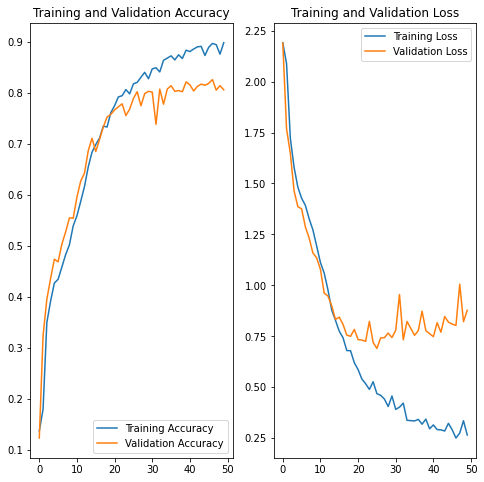

In [58]:
# Visualizing the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Model 4

In [59]:
# building the model
num_classes = 9
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [60]:
# compiling the model
model.compile(optimizer='adamax',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
# Viewing the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 32)        9248      
                                                      

In [62]:
# training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 32s 180ms/step - loss: 2.4317 - accuracy: 0.2190 - val_loss: 20.1422 - val_accuracy: 0.1403
Epoch 2/30
169/169 [==============================] - 31s 177ms/step - loss: 1.7587 - accuracy: 0.3372 - val_loss: 20.7070 - val_accuracy: 0.1403
Epoch 3/30
169/169 [==============================] - 30s 175ms/step - loss: 1.6321 - accuracy: 0.3659 - val_loss: 19.6700 - val_accuracy: 0.1641
Epoch 4/30
169/169 [==============================] - 31s 176ms/step - loss: 1.5778 - accuracy: 0.3911 - val_loss: 9.0148 - val_accuracy: 0.2851
Epoch 5/30
169/169 [==============================] - 30s 174ms/step - loss: 1.4806 - accuracy: 0.4312 - val_loss: 9.0752 - val_accuracy: 0.2554
Epoch 6/30
169/169 [==============================] - 31s 175ms/step - loss: 1.4213 - accuracy: 0.4659 - val_loss: 9.1065 - val_accuracy: 0.3096
Epoch 7/30
169/169 [==============================] - 31s 179ms/step - loss: 1.3641 - accuracy: 0.4820 - val_loss: 5.5239 - val_accuracy: 

In [64]:
# checking the accuracy of the model to know whether the model is overfitting or underfitting
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 6s 112ms/step - loss: 1.6631 - accuracy: 0.6518
Accuracy:  0.7262611389160156
Validation Accuracy:  0.6518188714981079
Loss:  1.1966084241867065
Validation Loss 1.663098931312561


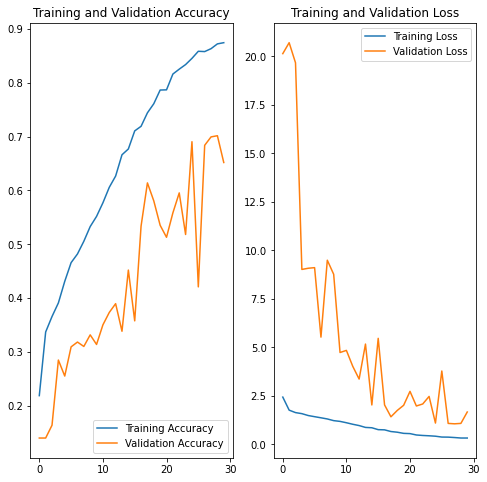

In [63]:
# Visualizing the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Conclusion

Model 1: Basic model

- Accuracy: around 91%

- Val. Accuracy: around 48%

Model 2: Basic model + dropouts

- Accuracy: around 59%

- Val. Accuracy: around 52%

Model 3: Basic model + dropouts + rebalancing

- Accuracy: around 95%

- Val. Accuracy: around 80%

Model 4: Basic model + dropouts + rebalancing + batch normalization (overfitted) 
- Accuracy: around 72%

- Val. Accuracy: around 65%

MODEL 3 (Basic model + dropouts + rebalancing) is a good model because the difference between training and validation set is less and accuracy is acceptable.